<a href="https://colab.research.google.com/github/jcausey-astate/ASRI-2025/blob/main/python_intermediate_classification_complete_ASRI25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification in Python (Intermediate)
## ASRI 2025


![Classification in Python (Intermediate)](https://jcausey-astate.github.io/ASRI-2025/images/classification_in_python_title_card.svg)

![The Palmer Archipelago penguins. Artwork by @allison_horst.](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

The notebook uses the following modules:

* `matplotlib`  : Provides basic graphing/charting.
* `numpy`       : Allows matrix and vector/array math.
* `pandas`      : Provides DataFrame functionality.
* `seaborn`     : Works with `matplotlib` to provide nicer graphs.
* `sklearn`     : Scikit-Learn provides machine learning and data manipulation tools.

We will rely heavily on the Scikit-Learn library for models, metrics, and
experimental design tools.  See the full documentation for this fantastic
library at <https://scikit-learn.org>.

---

## First, some terms and definitions:

**_Classification_** is the process of determining a _categorical label_ given
the _random variables_ for a given _sample_.

**_Categorical_** values are allowed to take on only a finite (usually small)
set of values.  Categorical variables are usually non-numeric, but are sometimes
encoded as numbers.  Sometimes we refer to values of this type as _labels_,
_factors_, or _classes_.

**_Continuous_** values are numeric values that are allowed to take on any value within
some range.

A **_sample_** consists of all of the experimental information gathered for one
item in the dataset.  Sometimes a _sample_ is called an _object_ or _item_.
Usually samples are arranged as _rows_ in tabular datasets (CSV files, Excel
spreadsheets, or similar).

A **_random variable_**, sometimes called an _input variable_, _measurement_, or
_feature_, is the recorded value for some property of the sample that was
measured in the experiment, e.g. "height", "age", "flower color", etc.

#### You have a _classification_ problem if the dependent variable (output value) you are trying to predict is _categorical_.

We will focus first on classification problems where the random variables are
_continuous_.

At the end, a section is provided with some tips for working with random variables that
are _categorical_.

___

## Let's see some code!

First, we have to import the modules, objects, and functions we will be using
in this tutorial:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### The Dataset

ℹ️  The `seaborn` package has some sample datasets included.

For this tutorial, we will use the "Palmer Penguins" dataset, which is called
`penguins` in the Seaborn index.  We can load it with the `load_dataset()`
function.  It will load up as a Pandas DataFrame.

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


The **species** column contains the value that we want to predict (it is our
_label_ column).  Although we could use all the other columns as random
variables (predictors), we will only focus on the numeric values for this part
of the tutorial.

It will make things easier if we create variables to contain the name of the
label column and the random variables.  These can be used when we interact with
Pandas DataFrames to quickly select those columns by name.  This way, we don't
have to type the list of names often, and we don't have to create a different
data structure that only contains our variables of interest (although you
_could_ also do it that way).

In [3]:
label_col = "species"
random_var_cols = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]

Let's use the `info()` DataFrame method to see what kinds of values we have, and
whether there are any missing values.

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Notice that there are some missing values.  We care most about the numeric
columns for this example, so we want to drop any rows with missing values in
those columns.

The `dropna()` method can do this.  The `subset` parameter lets us specify which
columns we care about (the random variables we specified earlier).  We use
`axis=0` to indicate that we want to drop _rows_, not columns.


In [5]:
penguins = penguins.dropna(subset=random_var_cols, axis=0)

### 📊 Visualize Early, Visualize Often

Let's take a look at the dataset.  We will plot two different 'views' for
comparison.  the first will compare bill length with bill depth, and the second
will compare bill length with flipper length.

We can color the datapoints according to species so that we can visually see how
separable the different classes might be.

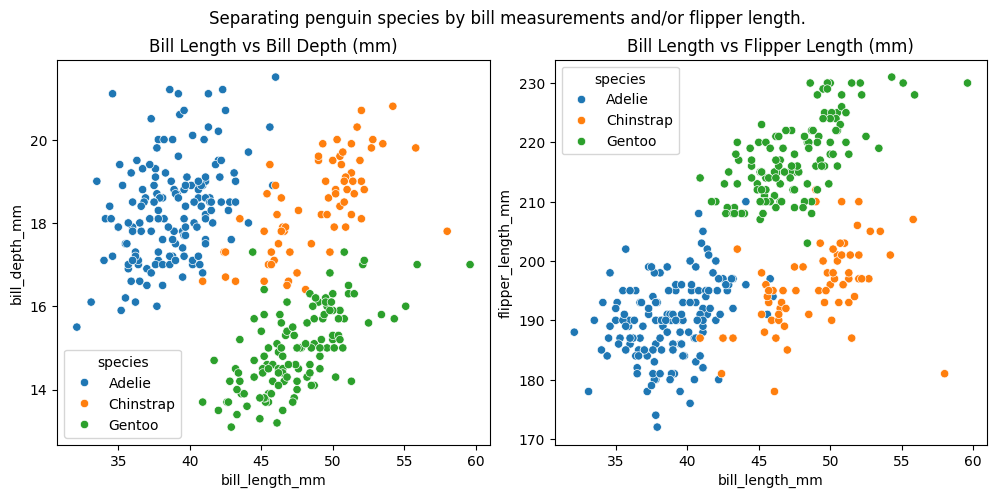

In [6]:
# create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
plt.suptitle("Separating penguin species by bill measurements and/or flipper length.")

# create first scatterplot using Seaborn
sns.scatterplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=ax1
)
ax1.set_title("Bill Length vs Bill Depth (mm)")

# create second scatterplot just like the first, but with different columns
sns.scatterplot(
    data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species", ax=ax2
)
ax2.set_title("Bill Length vs Flipper Length (mm)")

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.15)

# show the plots
plt.show()

If we look at these plots, it seems we can probably do a pretty good job of
separating the three classes.  We see that you could even get pretty good
performance by drawing a few lines to separate the groups (in other words, a
simple linear model might work reasonably well).

To see what a harder classification problem might look like, let's draw another
scatterplot where we compare the flipper length and the body mass:

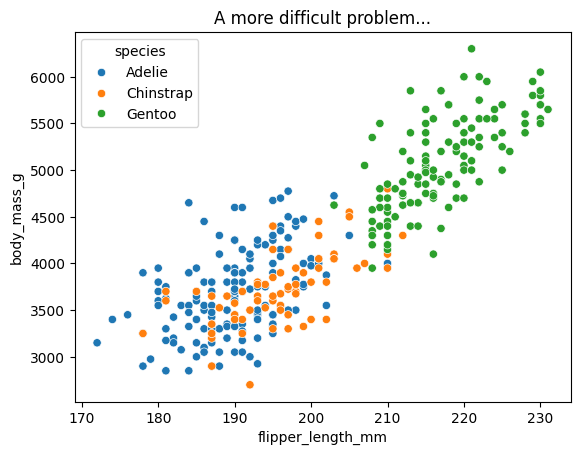

In [7]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.title("A more difficult problem...")
plt.show()

In this plot, it is very hard to see how we could separate the "Adelie" group
from the "Chinstrap" group.  There is even some mixing between the "Chinstrap"
and "Gentoo" groups.

✨ Choosing the right random variables for prediction is **vital**.  This is why
it is a good idea to get to know your dataset early in the process!  **Visualize
early, visualize often!**

## Let's see how well we can classify with a linear model.

First, we examine the `LogisticRegression` model (which is actually a
classification model -- don't let the name fool you).

Based on the graphs we plotted above, let's use the bill length and depth as our
random variables.  (ℹ️ : We could absolutely use all four random variables and
it would probably do better, but using just two gives us a chance to discuss the
performance with a very simple model.)


In [8]:
random_var_cols = [
    "bill_length_mm",
    "bill_depth_mm",
]

To quickly determine if it will be suitable to this problem, we can use the
`cross_val_score()` function from Scikit-Learn.  This function wraps up a
**lot** of functionality.  It will set up a [_k-fold cross validation_ experiment](https://scikit-learn.org/stable/modules/cross_validation.html)
(with default of $k=5$, for five-fold CV).  It will take the model of your
choice and automatically _train_ the model for each training fold, then
_predict_ the test cases and _score_ the predictions on the test folds (with the
_accuracy_ metric by default).

The scores for each fold are returned.  We can calculate and report the mean
score over all five folds along with the standard deviation of the scores to see
whether the model is able to do a good job in general, and how much variation we
would expect for different training sets.  Models should have high accuracy, and
a low standard deviation would indicate that the model generalizes to new data
very well.  (A high standard deviation would indicate the model is unstable and
doesn't generalize well.)


In [9]:
scores = cross_val_score(
    LogisticRegression(max_iter=500), X=penguins[random_var_cols], y=penguins[label_col]
)
print(
    f"mean: {scores.mean():0.3f}, std: {scores.std():0.3f}"
)  # print mean and standard deviation

mean: 0.962, std: 0.020


🎉 **Wow!** The linear model does a really good job on this problem!

OK, that isn't really surprising since we looked at the data first and we could
see that some combinations of our random variables provided good linear
separation between the groups.  Still, it's nice to see our intuition was
correct.

Let's take a look at a different kind of model, just for comparison.  A Random
Forest model is a non-linear model that works well for lots of tasks.
Scikit-Learn provides one called `RandomForestClassifier`.

Let's try it in exactly the same experimental setup we used for the linear
model.

In [10]:
scores = cross_val_score(
    RandomForestClassifier(random_state=1),
    X=penguins[random_var_cols],
    y=penguins[label_col],
)
print(f"mean: {scores.mean():0.3f}, std: {scores.std():0.3f}")

mean: 0.968, std: 0.017


Here, the random forest did about the same as the linear model (especially if we
take the standard deviations of scores into account).

If we wanted to pick between these two models for this problem, we should
probably choose the _simpler_ one -- the logistic regression model.

💡 The **_Principle of Parsimony_** says that given the choice between multiple
models with similar performance, the best choice is usually the simplest model.

ℹ️  One note:

We used `random_state=1` to _seed_ the random number generator within the model,
causing it to produce identical results if we train it again on the same data.
Random forests (as implied by their name) rely on some randomness during
training, so you don't expect to get the same performance every time.  This
makes **reproducible results** difficult.

💡 By seeding the random state, we "lock" it to a specific outcome (assuming no
external changes).  This way, others can reproduce our results in the future.


## Exploring more ways to characterize classifier performance.

### 📊 Visualize!

When the model is making incorrect predictions, sometimes we want to know _which
samples the model predicts incorrectly_.  This can help us diagnose whether the
model is doing the best it can, whether the model is doing strange things, or
even whether there might be a problem with the dataset itself.

Generally, a good starting point to diagnosing the mis-predicted values from a
model is for us to _visualize_ them in some way.   Since this problem is easy to
visualize as a 2-D scatterplot, we will use that as a way to see which samples
the model is getting right vs. wrong.


To start, let's just split the dataset into a simple 80% / 20% train / test
split.  That means that we will reserve 20% of the samples for the test set, and
the other 80% will be used for training.  Scikit-Learn has a simple function for
doing this (`train_test_split()`).

The function returns a training and testing dataframe (or matrix) given the
original full dataset and the fraction you want to hold out for the test set.

In [11]:
train_df, test_df = train_test_split(penguins, test_size=0.20, random_state=2)

We'll use the `LogisticRegression` model again, training it on the "train"
partition (using the `fit()` method).  Then, we'll predict the "test" samples
and calculate the (balanced) accuracy score.

In [12]:
model = LogisticRegression(max_iter=500).fit(
    X=train_df[random_var_cols], y=train_df[label_col]
)
preds = model.predict(test_df[random_var_cols])
ground_truth = test_df[label_col]
print(f"{balanced_accuracy_score(ground_truth, preds):0.3f}")

0.932


Now, let's create the scatterplot that will show _which samples were predicted
**incorrectly**_.

We can use color to indicate correct (green) and incorrect (red) predictions.
We will also use different marker shapes to indicate the true class label so
that we can see which ones are being predicted incorrectly and get a sense for
_why_.

['Gentoo' 'Adelie' 'Chinstrap']


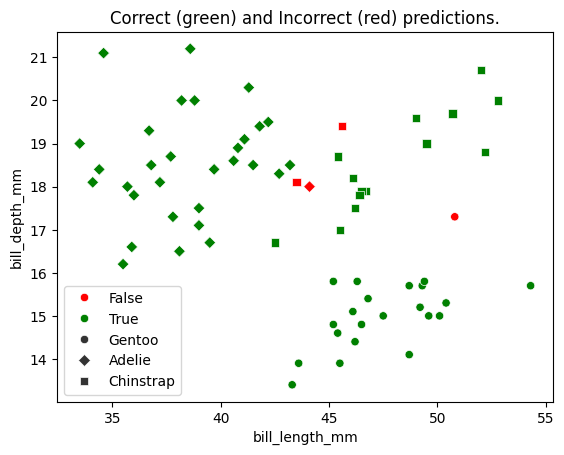

In [13]:
plt.figure()
fig = sns.scatterplot(
    data=test_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue=(preds == ground_truth),
    style=list(test_df[label_col].values),
    markers=["o", "D", "s"],
    palette=["red", "green"],
)
fig.legend()  # weird kludge:  The "species" title is shown by default, but just calling `legend()` removes it.  Why? 🤷
plt.title("Correct (green) and Incorrect (red) predictions.")
print(test_df[label_col].unique())

The green dots are samples that were correctly predicted and the red dots are
incorrect predictions.  There are only four incorrect predictions.  Three of
those are near the "border" between the two visual "clusters".  That makes sense
-- class mixing obviously occurs here.  The other one is a Gentoo penguin that
was incorrectly predicted (probably as a Chinstrap, since there are Chinstrap
penguins nearby).

**At this point, we will make the problem harder.**  Why?  Well, it will be more
interesting to explore correct / incorrect predictions if the model is not quite
so good.

The flipper length and body mass do not combine to give very good separation, so
we will choose those as our random variables from this point forward.  

🤔 Of course, we would never choose _worse_ predictors in any real analysis, but doing this can be useful as a learning exercise.

In [14]:
random_var_cols = ["flipper_length_mm", "body_mass_g"]

Let's see how our new random variables perform with the same linear model as
before:

In [15]:
scores = cross_val_score(
    LogisticRegression(max_iter=500), X=penguins[random_var_cols], y=penguins[label_col]
)
print(f"mean: {scores.mean():0.3f}, std: {scores.std():0.3f}")

mean: 0.690, std: 0.061


Much worse performance! 😦  That's bad... But more interesting for exploring the
performance metrics.

In [16]:
scores = cross_val_score(
    RandomForestClassifier(random_state=1),
    X=penguins[random_var_cols],
    y=penguins[label_col],
)
print(f"mean: {scores.mean():0.3f}, std: {scores.std():0.3f}")

mean: 0.772, std: 0.041


The random forest did quite a bit better here.  We saw that these two variables
don't provide an obvious path for _linear_ separation, but the random forest is
not limited to linear decision boundaries.

We will use our simple 80%/20% train/test split from earlier and train the
linear model using the new (worse) combination of random variables.  First,
train the model:

In [17]:
model = LogisticRegression(max_iter=500).fit(
    X=train_df[random_var_cols], y=train_df[label_col]
)
preds = model.predict(test_df[random_var_cols])
ground_truth = test_df[label_col]
print(f"{balanced_accuracy_score(ground_truth, preds):0.3f}")

0.716


### Confusion Matrix

Now, we can use another visualization technique to discuss the performance
characteristics.  This technique is called a _confusion matrix_.  It shows the
number of samples from each true label that were predicted as each possible
output label.  Seaborn makes very nice confusion matrix plots.

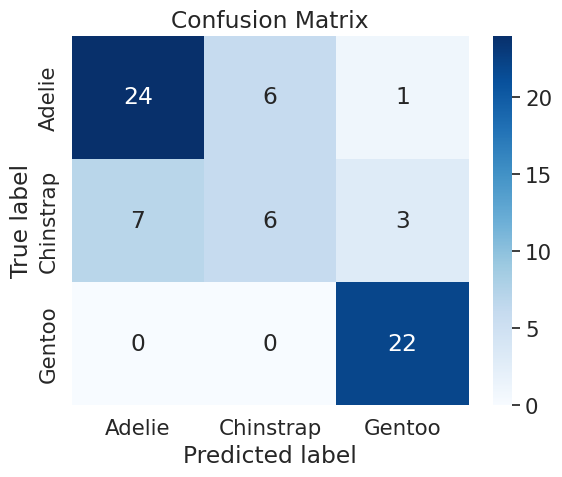

In [18]:
cm = confusion_matrix(ground_truth, preds)

# plot the confusion matrix using seaborn heatmap
sns.set(font_scale=1.4)  # adjust font size
labels = model.classes_
sns.heatmap(
    cm, annot=True, fmt="g", cmap="Blues", xticklabels=labels, yticklabels=labels
)

# add axis labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

# show the plot
plt.show()

**Correct** predictions appear along the diagonal (upper-left to lower-right).
All of the other squares represent **incorrect** predictions.

Here, the linear model did very well with predicting Gentoo penguins when it saw
a _real_ Gentoo.  But it also incorrectly guessed that 3 Chinstraps and 1 Adelie
were Gentoos as well (**_False Positives_**).

As for the Chinstraps, we correctly classified 6 of them, but we incorrectly
labeled 7 Chinstraps as Adelie and 3 as Gentoo (**_False Negatives_**).

### Non-visual metrics

Let's look at other classification metrics.

Scikit-Learn provides several metrics appropriate for evaluating classification
models.  You can see the list at
<https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics>.

We will start with the `classification_report()` function, which combines
several popular metrics into a single report.

In [19]:
# We get precision, recall, and f1-score from the classification report.
# You can also get these individually from functions in sklearn.metrics.
print(classification_report(ground_truth, preds))

              precision    recall  f1-score   support

      Adelie       0.77      0.77      0.77        31
   Chinstrap       0.50      0.38      0.43        16
      Gentoo       0.85      1.00      0.92        22

    accuracy                           0.75        69
   macro avg       0.71      0.72      0.71        69
weighted avg       0.73      0.75      0.74        69



**What about binary classification?**

So far, we've been performing _multi-class_ classification:  There were three
possible classes {Adelie, Chinstrap, Gentoo}, and each sample could only be a
member of a single class.

Many classification problems can be expressed as _binary_ classification
problems.  That just means that there are _two_ classes (and all samples must be
one or the other, but not both).

Some metrics make sense with binary problems, but not with multi-class problems.
Let's change our dataset to make it into a binary classification problem.  To do
this, we will simply change classification to answer the question "Chinstrap or
not?".  So, our new labels will be {Chinstrap, Other}.  To do this, we will make
a copy of our dataset and modify the `species` column to reflect the binary
labeling.


In [20]:
# Make a binary dataset by splitting the "Adelie" and "Gentoo" penguins
# away from the "Chinstrap" penguins.
binary_penguins = penguins.copy()
binary_penguins.loc[binary_penguins["species"] != "Chinstrap", "species"] = "Other"

# Create new train/test split with the new dataset.  (80%/20% as before)
b_train_df, b_test_df = train_test_split(
    binary_penguins, test_size=0.20, random_state=2, stratify=binary_penguins["species"]
)
# Fit a linear model to the new dataset
model = LogisticRegression(max_iter=500).fit(
    X=b_train_df[random_var_cols], y=b_train_df[label_col]
)
# And predict on the test set.
preds = model.predict(b_test_df[random_var_cols])
ground_truth = b_test_df[label_col]
print(f"Acc: {accuracy_score(ground_truth, preds):0.3f}")
print(classification_report(ground_truth, preds))

Acc: 0.783
              precision    recall  f1-score   support

   Chinstrap       0.33      0.07      0.12        14
       Other       0.80      0.96      0.88        55

    accuracy                           0.78        69
   macro avg       0.57      0.52      0.50        69
weighted avg       0.71      0.78      0.72        69



We can see that the binary accuracy is about 78%.

#### Receiver Operating Characteristic (ROC) Curve and Area Under the ROC Curve (AUC)

A common way of comparing binary classifier is by **visually** interpreting a
performance curve called the **_Receiver Operating Characteristic_** (ROC) curve,
or by **numerically** interpreting the area under the ROC curve (AUC or AUROC).

To create an ROC curve, we need to predict the _probability_ that each sample
belongs to the "positive" class.  In Scikit-Learn compatible models, you can use
the `predict_proba()` method to do this.

In [21]:
probas = model.predict_proba(b_test_df[random_var_cols])

`predict_proba` gives a score for each class.  For binary problems, we only need
the score for the first class (the "positive" class).  We will select that by
slicing off the first column from all the rows in `probas`:

In [22]:
probas_pos = probas[:, 0]

We can make a binary (1,0) ground truth by comparing the labels with the first
class in our model (which we will consider the "positive" class):

In [23]:
ground_truth = b_test_df[label_col] == model.classes_[0]

The ROC curve plots the True-Positive Rate (tpr) against the False-Positive Rate
(fpr) given all possible thresholds (from 0.0 to 1.0).  The `roc_auc_score()`
function from Scikit-Learn can compute the tpr and fpr scores for us, given the
ground truth and predicted probabilities:

In [24]:
fpr, tpr, _ = roc_curve(ground_truth, probas_pos)

And the `roc_auc_score()` will calculate the area under the ROC curve, given the
same information:

In [25]:
auc = roc_auc_score(ground_truth, probas_pos)

Now, let's plot the ROC curve and display the AUC in the legend using
Matplotlib:

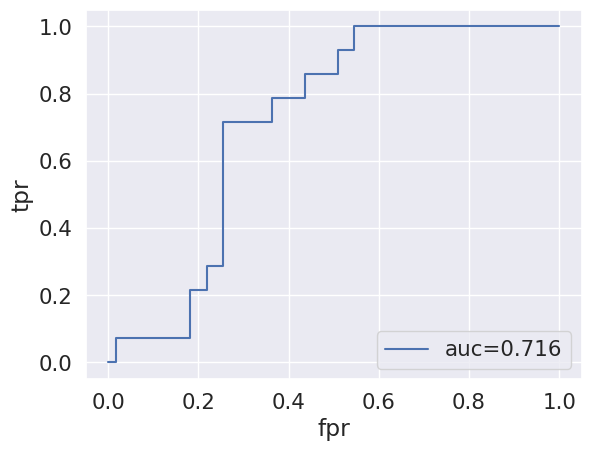

In [26]:
plt.plot(fpr, tpr, label=f"auc={auc:0.3f}")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

Since we might want to compare multiple models on the same figure, let's make a
function that will take a dictionary of the form `{name: model}` of models,
the training and testing samples and labels, and plot the ROC curve for all models:

In [27]:
# plots multiple models on the same ROC plot and compare them visually:
def multi_auc_comparison(models, X_train, y_train, X_test, y_test):
    for name in models:
        model = models[name]
        model.fit(X_train, y_train)
        probas = model.predict_proba(X_test)[:, 0]
        fpr, tpr, _ = roc_curve(y_test, probas)
        auc = roc_auc_score(y_test, probas)
        plt.plot(fpr, tpr, label=f"{name} AUC: {auc:0.3f}")
        plt.xlabel("fpr")
        plt.ylabel("tpr")
        plt.title("ROC Curve Comparision")
    plt.legend(loc=4)
    plt.show()

Let's see it in action by comparing the linear logistic regression model to the
random forest model:

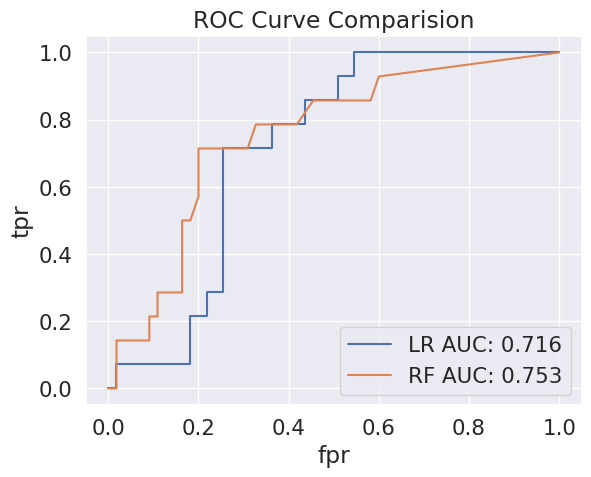

In [28]:
multi_auc_comparison(
    {
        "LR": LogisticRegression(max_iter=500),
        "RF": RandomForestClassifier(random_state=1),
    },
    b_train_df[random_var_cols],
    b_train_df[label_col],
    b_test_df[random_var_cols],
    ground_truth,
)

Generally, the higher AUC is better, but we can see from the ROC curve plot that
there is some tradeoff in the performance characteristics (tradeoff between
false positives and false negatives).

## Working with categorical features

So far, we only used numeric features for our predictors.  But, the Palmer Penguins
dataset also contains some _categorical_ features:

* `island` - three levels: ['Biscoe', 'Dream', 'Torgersen']
* `sex` - two levels ['Male', 'Female']

Binary variables (with only two levels) can be re-encoded as 0 and 1 and used essentially the same
as a continuous numeric variable.

Variables with more than two levels require a little more thought.  You _could_ encode them using
different numeric levels (e.g. {-1, 0, 1}), but this might not always work well.  A common approach to
multi-level categorical variables is to **_one-hot encode_** them.

**_One-hot encoding_** is an encoding technique in which a variable with $N$ levels is split into $N$ new _pseudo-variables_ where each is a binary variable encoded as 1 or 0.

Let's see how our `island` variable might look if it were one-hot encoded:

**Before**

    species island    bill_length_mm bill_depth_mm ...
    Adelie  Biscoe    38.8           17.2          ...
    Adelie  Torgersen 40.3           18.0          ...
    Adelie  Torgersen 39.1           18.7          ...
    Adelie  Biscoe    37.8           18.3          ...
    Adelie  Dream     39.5           17.8          ...
    Adelie  Biscoe    38.2           18.1          ...
    Adelie  Torgersen 36.7           19.3          ...
    Adelie  Dream     37.2           18.1          ...

**After**

    species island_Biscoe island_Dream island_Torgersen bill_length_mm bill_depth_mm ...
    Adelie  1             0            0                38.8           17.2          ...
    Adelie  0             0            1                40.3           18.0          ...
    Adelie  0             0            1                39.1           18.7          ...
    Adelie  1             0            0                37.8           18.3          ...
    Adelie  0             1            0                39.5           17.8          ...
    Adelie  1             0            0                38.2           18.1          ...
    Adelie  0             0            1                36.7           19.3          ...
    Adelie  0             1            0                37.2           18.1          ...


**Heres the code:**

Pandas can do this in a dataframe by using the `get_dummies()` method.  You provide a prefix
(like `"island"`) and the existing levels are used to complete the new column names.

By default, the values will be Boolean (True, False), but we can use `dtype=int` to make them
integers.  (ℹ️ You don't have to do this - the Boolean values will convert automatically when needed. We do it here just to be explicit about how the categories are becoming numbers.)


In [29]:
penguins_encoded = pd.get_dummies(
    penguins, columns=["island"], prefix="island", dtype=int
)
penguins_encoded.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,Male,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,Female,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,Female,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,Female,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,Male,0,0,1


As you can see, the island column is gone and replaced with three binary columns.  Let's query some random rows to see more than just Torgersen island:

In [30]:
penguins_encoded.sample(n=5, random_state=0)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
93,Adelie,39.6,18.1,186.0,4450.0,Male,0,1,0
281,Gentoo,46.2,14.9,221.0,5300.0,Male,1,0,0
133,Adelie,37.5,18.5,199.0,4475.0,Male,0,1,0
280,Gentoo,45.3,13.8,208.0,4200.0,Female,1,0,0
7,Adelie,39.2,19.6,195.0,4675.0,Male,0,0,1


#### There's More Than One Way to Do It

You can also use the `OneHotEncoder` from Scikit-Learn to encode a single variable.  It is not as simple as the Pandas method shown above when you have categorical and numeric values in a dataframe, but it works great when you need to one-hot encode your output label.  (ℹ️ Some models require that categorical outputs are one-hot encoded.  Scikit-Learn models usually don't require this.)

Here's how it would look to encode the `island` column and print five rows.

In [31]:
encoded_island = (
    OneHotEncoder().fit_transform(penguins[["island"]]).toarray()
)  # NOTE: the extra [] is necessary to get the correct shape for the single columns we are selecting.

# The following lines are all related to printing five example rows.  The line above did all the hard work.
np.random.seed(0)
idx = np.random.permutation(np.arange(len(encoded_island)))
print(encoded_island[idx[:5]])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


There are _several_ also other approaches to encoding categorical values.  

You can learn a lot more here: <https://www.kaggle.com/code/arashnic/an-overview-of-categorical-encoding-methods>

## Thank You!

This notebook in tutorial and completed form is available at:

<https://jcausey-astate.github.io/ASRI-2025/>
